1.Import the dataset and explore basic info (nu ls, data types)

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ashwi\Downloads\Titanic-Dataset.csv")  
print(df.head())
print(df.info())
print(df.describe())
print(df.dtypes)
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

2.Handle missing values using mean/median/imputation.

In [9]:
#mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

#median
df['Age'] = df['Age'].fillna(df['Age'].median())
print(df[['Age']].head(10))


         Age
0  22.000000
1  38.000000
2  26.000000
3  35.000000
4  35.000000
5  29.699118
6  54.000000
7   2.000000
8  27.000000
9  14.000000


 3.Convert categorical features into numerical using encoding

In [12]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [13]:
print(df.head())
print(df.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  NaN  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  38.0      1      0   
2                             Heikkinen, Miss. Laina  NaN  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  35.0      1      0   
4                           Allen, Mr. William Henry  NaN  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
PassengerId      int

4.Normalize/standardize the numerical features.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [17]:
print(df[num_cols].head())

        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


5.Visualize outliers using boxplots and remove them.

1: Visualize Outliers using Boxplots

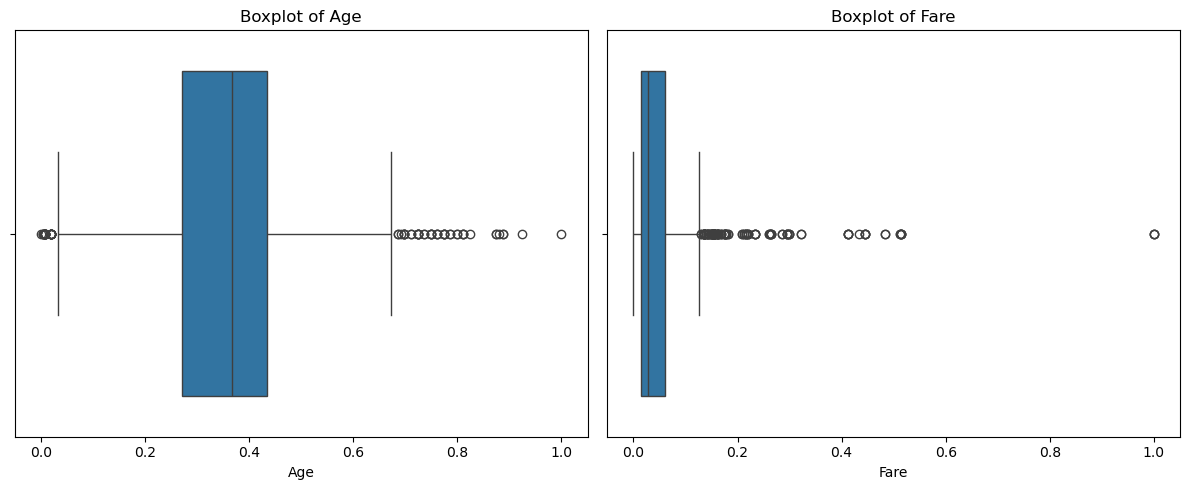

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# For Age and Fare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

2: Remove Outliers Using IQR

In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# on Age and Fare
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')


In [21]:
print(df[['Age', 'Fare']].describe())

              Age        Fare
count  718.000000  718.000000
mean     0.352384    0.033559
std      0.126094    0.025852
min      0.032420    0.000000
25%      0.271174    0.015399
50%      0.367921    0.022934
75%      0.407829    0.050608
max      0.673285    0.119804
